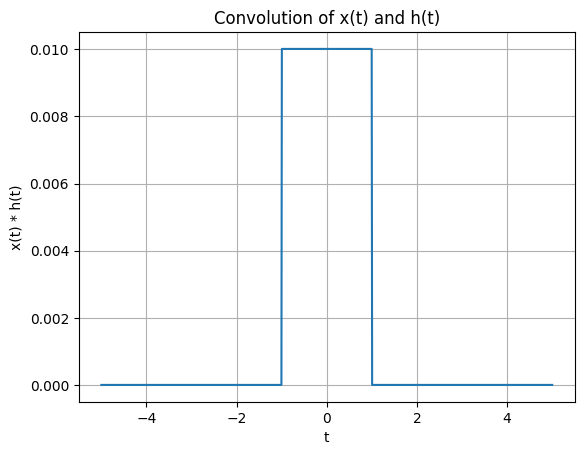

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def x(t):
    return np.where(np.abs(t) <= 1, 1, 0)

def h(t):
    return np.where((t >= -1) & (t < 0), -1, np.where((t >= 0) & (t <= 1), 1, 0))

def convolution(x, h, t):
    dt = t[1] - t[0]
    y = np.zeros_like(t)
    for i in range(len(t)):
        tau = t[i]
        integrand = x(tau) * h(t - tau)
        y[i] = np.sum(integrand) * dt
    return y

t = np.linspace(-5, 5, 1000)
y = convolution(x, h, t)

plt.plot(t, y)
plt.title('Convolution of x(t) and h(t)')
plt.xlabel('t')
plt.ylabel('x(t) * h(t)')
plt.grid(True)
plt.show()

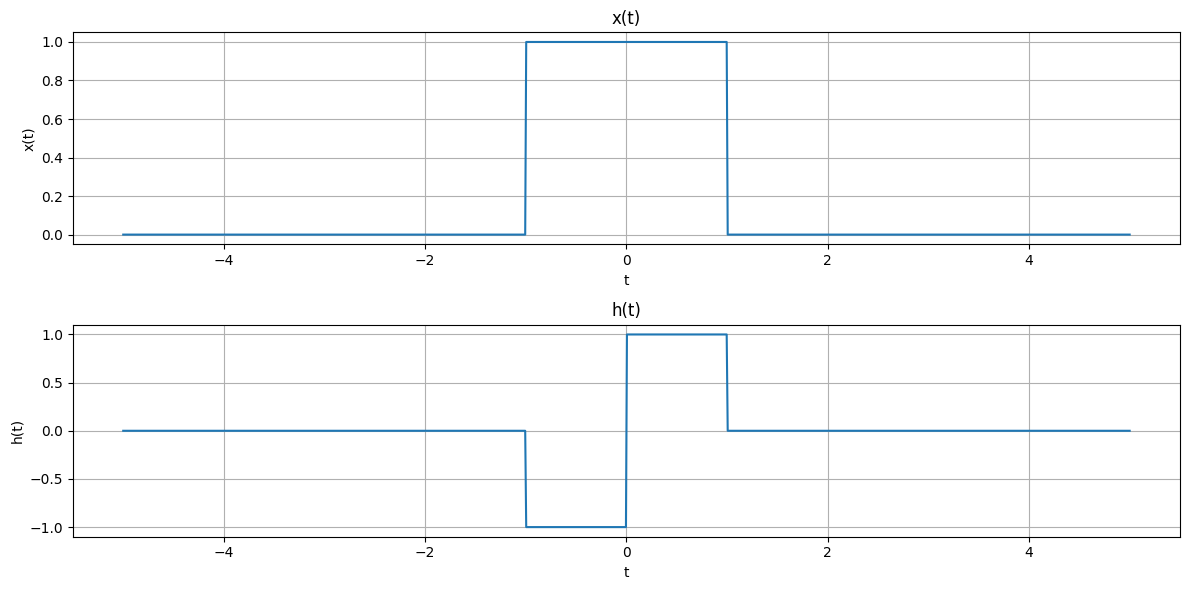

In [3]:
plt.figure(figsize=(12, 6))

# Plot x(t)
plt.subplot(2, 1, 1)
plt.plot(t, x(t))
plt.title('x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)

# Plot h(t)
plt.subplot(2, 1, 2)
plt.plot(t, h(t))
plt.title('h(t)')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid(True)

plt.tight_layout()
plt.show()

$[ y(t) = \begin{cases} 0 & \text{if } t < -2 \ -t - 2 & \text{if } -2 \leq t < -1 \ t & \text{if } -1 \leq t < 0 \ -t + 2 & \text{if } 0 \leq t < 1 \ 2 - t & \text{if } 1 \leq t < 2 \ 0 & \text{if } t \geq 2 \end{cases} ]$

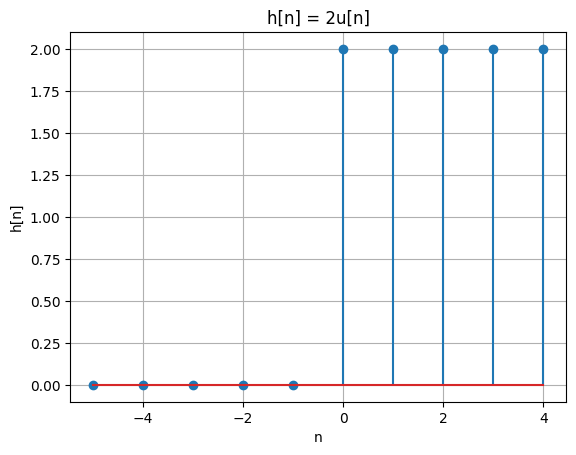

In [13]:
# Define the unit step function u[n]
def u(n):
    return np.where(n >= 0, 1, 0)

# Define h[n] = 2u[n]
h_n = 2 * u(n)

# Plot h[n]
plt.stem(n, h_n)
plt.title('h[n] = 2u[n]')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)
plt.show()

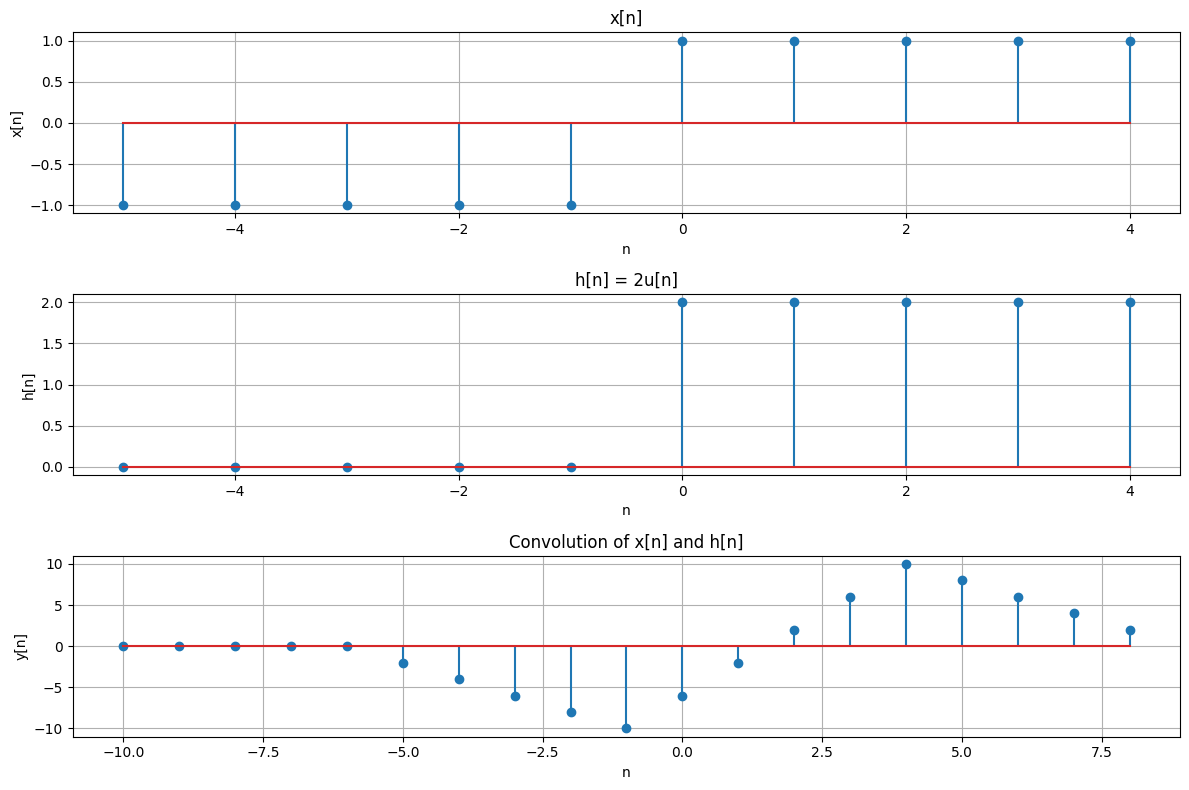

In [15]:
from scipy.signal import convolve

# Plot x[n]
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n, x_n)
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)

# Plot h[n]
plt.subplot(3, 1, 2)
plt.stem(n, h_n)
plt.title('h[n] = 2u[n]')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)

# Convolution of x[n] and h[n]
y_conv = convolve(x_n, h_n, mode='full')
n_conv = np.arange(n[0] + n[0], n[-1] + n[-1] + 1)

plt.subplot(3, 1, 3)
plt.stem(n_conv, y_conv)
plt.title('Convolution of x[n] and h[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)

plt.tight_layout()
plt.show()

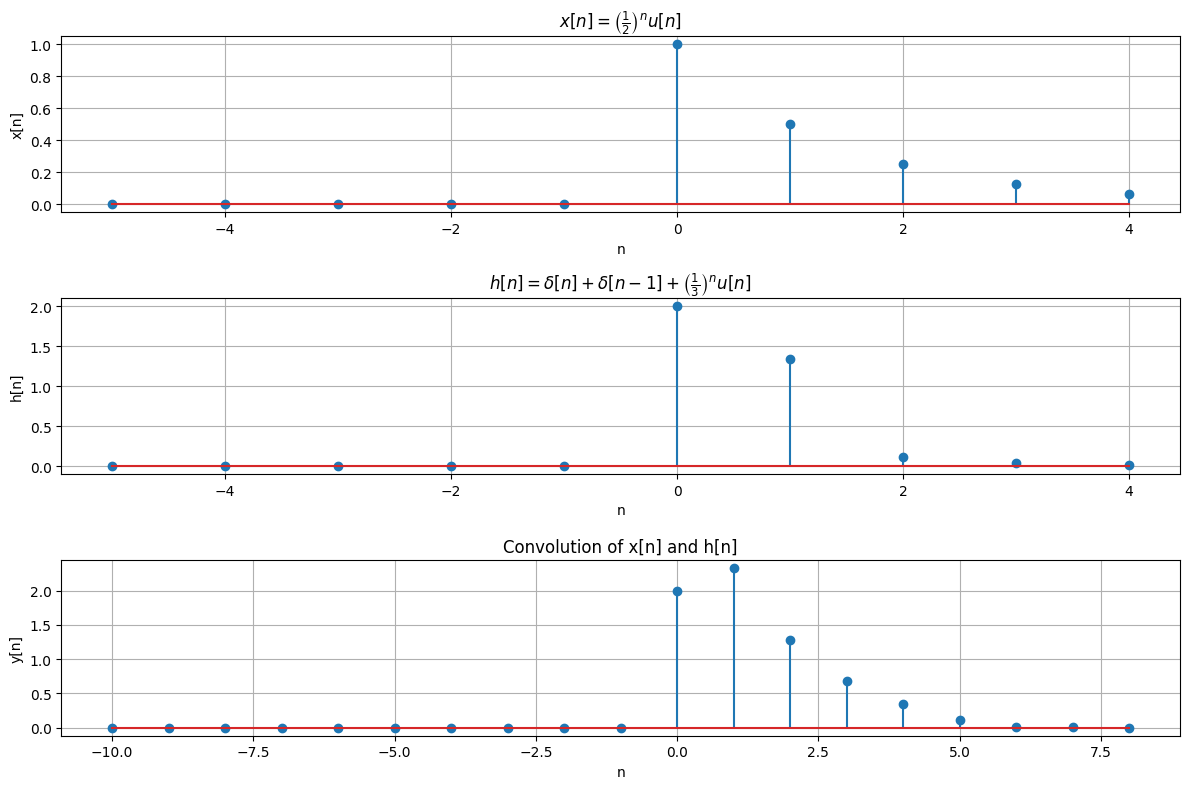

In [16]:
# Define the unit step function u[n]
def u(n):
    return np.where(n >= 0, 1, 0)

# Define delta function
def delta(n):
    return np.where(n == 0, 1, 0)

# Define x[n] = (1/2)^n * u[n]
x_n = (1/2)**n * u(n)

# Define h[n] = delta[n] + delta[n-1] + (1/3)^n * u[n]
h_n = delta(n) + delta(n-1) + (1/3)**n * u(n)

# Convolution of x[n] and h[n]
y_conv = convolve(x_n, h_n, mode='full')
n_conv = np.arange(n[0] + n[0], n[-1] + n[-1] + 1)

# Plot x[n], h[n], and their convolution
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n, x_n)
plt.title(r'$x[n] = \left( \frac{1}{2} \right)^n u[n]$')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, h_n)
plt.title(r'$h[n] = \delta[n] + \delta[n-1] + \left( \frac{1}{3} \right)^n u[n]$')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n_conv, y_conv)
plt.title('Convolution of x[n] and h[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)

plt.tight_layout()
plt.show()